In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
housing_data = pd.read_csv('BostonHousing.csv')

In [3]:
housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
housing_data.duplicated().sum()

0

In [7]:
X = housing_data.drop(columns = ['medv'])
y = housing_data.medv

sc = StandardScaler()
X = sc.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [9]:
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))


model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
9/9 [==============================] - 3s 27ms/step - loss: 578.3487 - mae: 22.2700 - val_loss: 512.3430 - val_mae: 20.8250
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 518.6722 - mae: 20.8911 - val_loss: 447.9922 - val_mae: 19.2903
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 447.7478 - mae: 19.1836 - val_loss: 367.3255 - val_mae: 17.2727
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 361.3030 - mae: 16.9121 - val_loss: 270.7122 - val_mae: 14.5804
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 260.8445 - mae: 13.9525 - val_loss: 169.2938 - val_mae: 11.1676
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 162.9163 - mae: 10.5433 - val_loss: 91.5785 - val_mae: 7.3806
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 92.2757 - mae: 7.6138 - val_loss: 58.1671 - val_mae: 5.6682
Epoch 8/200
9/9 [==============================] - 0s 6ms/st

In [11]:
print(len(history.history['mae']))

200


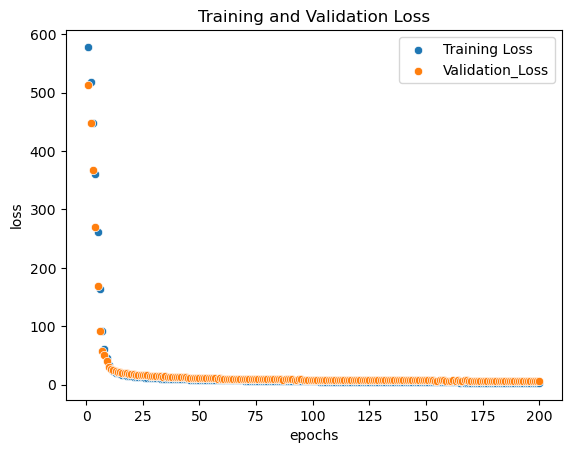

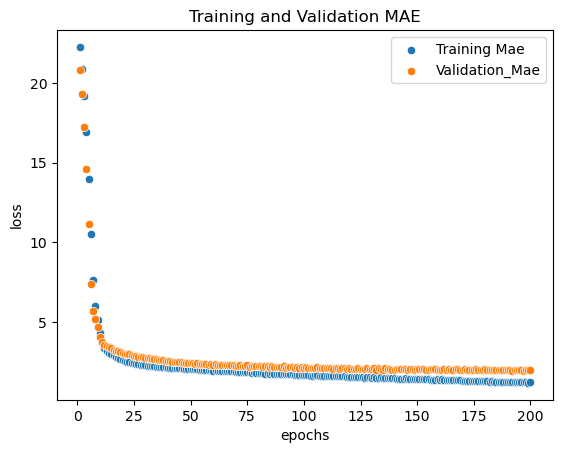

In [12]:
sns.scatterplot(y = history.history['loss'],x = range(1,200+1))
sns.scatterplot(y = history.history['val_loss'],x = range(1,200+1))
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training Loss','Validation_Loss'])
plt.show()


sns.scatterplot(y = history.history['mae'],x = range(1,200+1))
sns.scatterplot(y = history.history['val_mae'],x = range(1,200+1))
plt.title('Training and Validation MAE')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training Mae','Validation_Mae'])
plt.show()

In [13]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 3ms/step - loss: 16.2085 - mae: 2.8708
Mean squared error on test data:  16.208465576171875
Mean absolute error on test data:  2.8708438873291016
